<a href="https://colab.research.google.com/github/JulianDR26/Se-ales-y-Sistemas-2024-1S/blob/main/EXAMEN_2_SYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXAMEN 2 SEÑALES Y SISTEMAS**

JULIAN DAVID RIVERA PRADA

###**1) RESOLVER**

**Espectro de Fourier de $x(t) = |A sin(2\pi F_0 t)|^2$**

Dada Esta señal $ x(t) = |A \sin(2\pi F_0 t)|^2 $ con $ t \in \left[-\frac{1}{2F_0}, \frac{1}{2F_0}\right] $, queremos encontrar su transformada de Fourier tanto en forma exponencial como en forma trigonométrica.

\
**1. Expresión de la señal simplificada**

Primero, expresamos la señal en una forma más conveniente. Sabemos que:

$x(t) = |A \sin(2\pi F_0 t)|^2 = A^2 \sin^2(2\pi F_0 t)$

\
**2. Uso de la identidad trigonométrica**

Utilizamos la identidad trigonométrica:

$\sin^2(\theta) = \frac{1 - \cos(2\theta)}{2}$

Sustituyendo $\theta = 2\pi F_0 t$ en nuestra señal:

$x(t) = A^2 \sin^2(2\pi F_0 t) = A^2 \cdot \frac{1 - \cos(4\pi F_0 t)}{2}$

Por lo tanto, la señal $x(t)$ se simplifica a:

$x(t) = \frac{A^2}{2} - \frac{A^2}{2} \cos(4\pi F_0 t)$

\
**3. Forma exponencial del espectro de Fourier**

La transformada de Fourier de una señal \( x(t) \) se define como:

$X(f) = \int_{-\infty}^{\infty} x(t) e^{-j2\pi ft} dt$

Sustituimos la expresión de $ x(t) $:

$X(f) = \int_{-\frac{1}{2F_0}}^{\frac{1}{2F_0}} \left( \frac{A^2}{2} - \frac{A^2}{2} \cos(4\pi F_0 t) \right) e^{-j2\pi ft} dt$

Esta integral se puede dividir en dos partes:

$X(f) = \frac{A^2}{2} \int_{-\frac{1}{2F_0}}^{\frac{1}{2F_0}} e^{-j2\pi ft} dt - \frac{A^2}{2} \int_{-\frac{1}{2F_0}}^{\frac{1}{2F_0}} \cos(4\pi F_0 t) e^{-j2\pi ft} dt$

Cada una de estas integrales se puede resolver usando propiedades estándar de las transformadas de Fourier.

\
**4. Forma trigonométrica del espectro de Fourier**

La forma trigonométrica de la transformada de Fourier se obtiene al recordar que la exponencial compleja $e^{j\theta}$ puede descomponerse en términos de seno y coseno:

$e^{j\theta} = \cos(\theta) + j\sin(\theta)$

Por lo tanto, la transformada de Fourier en forma trigonométrica se obtiene separando las partes reales e imaginarias de la forma exponencial.

La Solución Detallada del Punto 1 se encuentra en el pdf adjunto escrito a mano propia en el **Github**


###**2) SIMULACIÓN DEL PUNTO 1**

<ipython-input-2-5c096743736c>:23: RuntimeWarning: divide by zero encountered in log10
  magnitude_db = 20 * np.log10(np.abs(X_f_shifted))


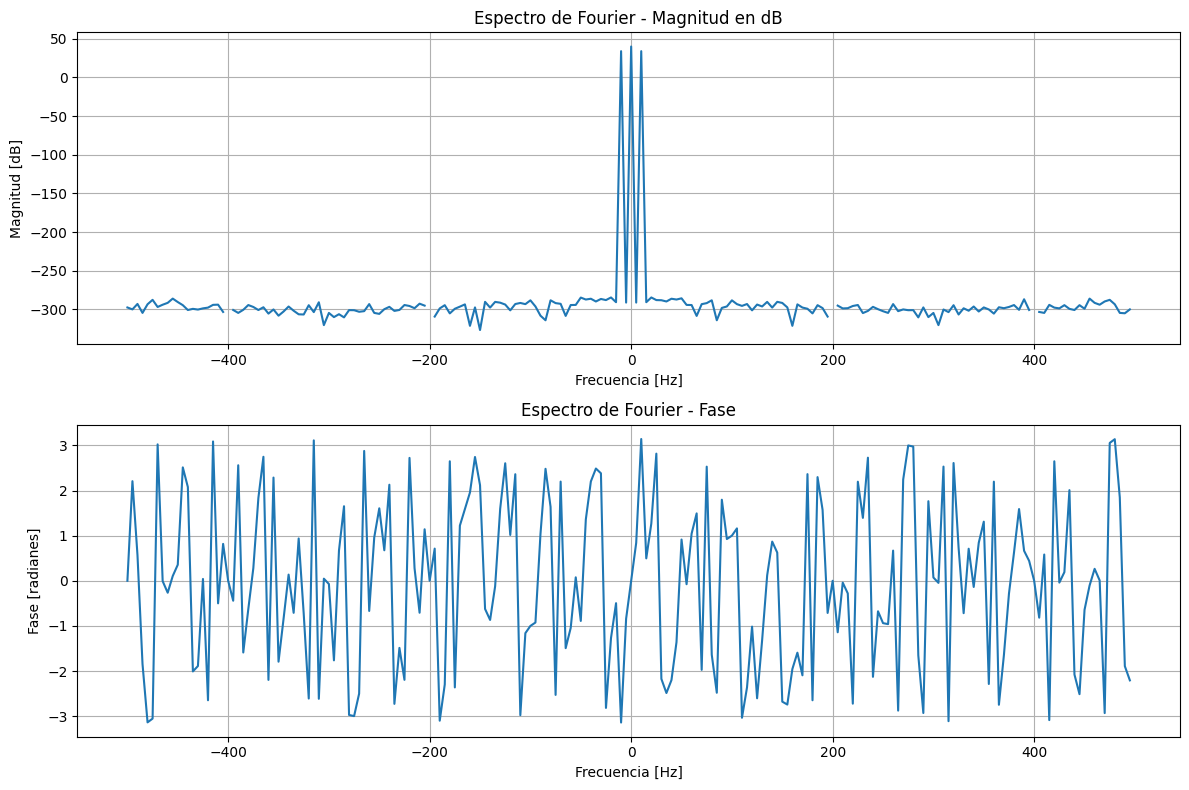

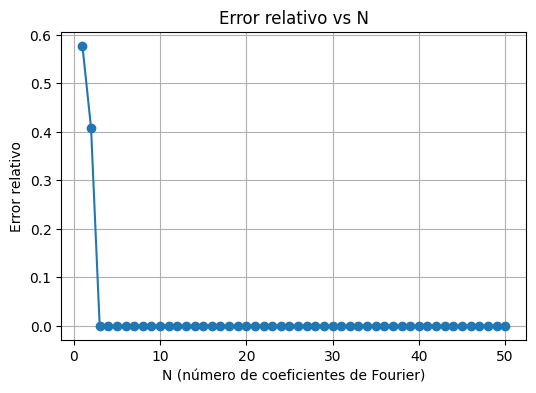

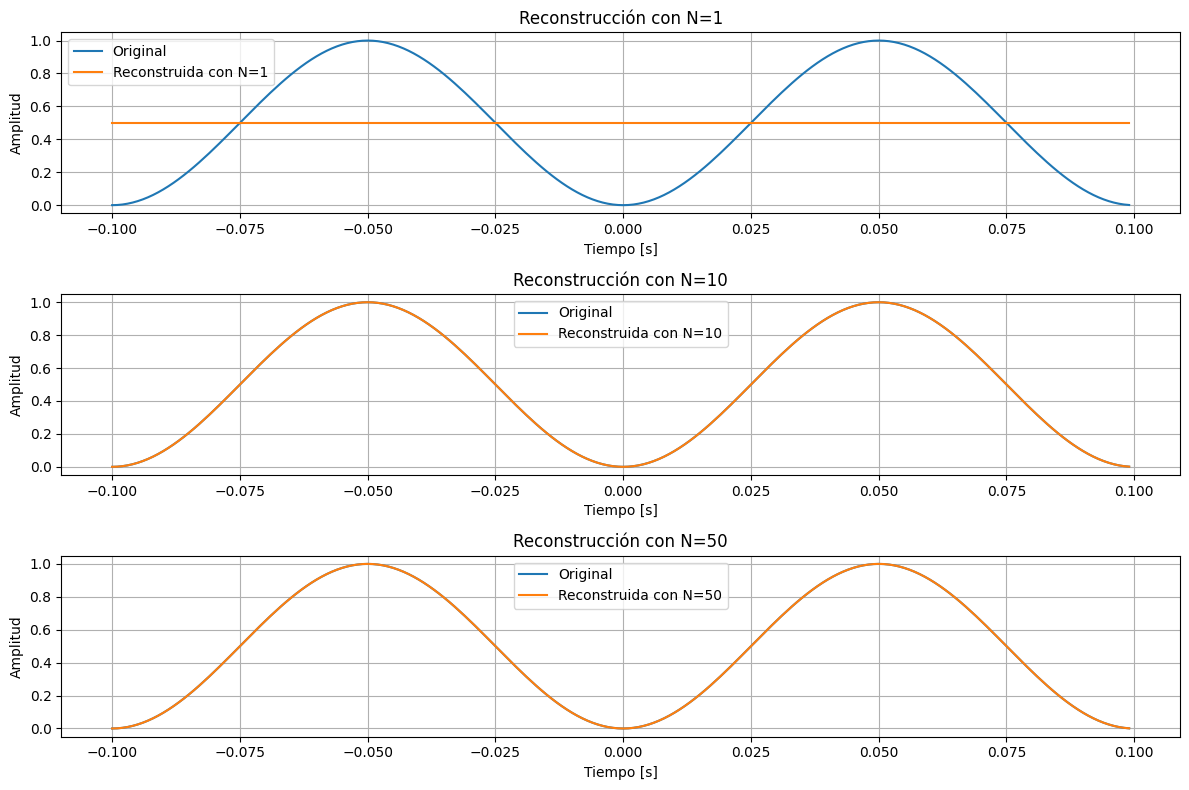

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
A = 1  # Amplitud de la señal
F0 = 5  # Frecuencia fundamental
T = 1 / F0  # Periodo de la señal
fs = 1000  # Frecuencia de muestreo
t = np.linspace(-T/2, T/2, int(T * fs), endpoint=False)  # Vector de tiempo

# 1. Definir la señal x(t) = A^2 * sin^2(2*pi*F0*t)
x_t = A**2 * np.sin(2 * np.pi * F0 * t)**2

# 2. Aplicar la Transformada de Fourier
X_f = np.fft.fft(x_t)
frequencies = np.fft.fftfreq(len(X_f), 1/fs)

# 3. Centramos el espectro y las frecuencias
X_f_shifted = np.fft.fftshift(X_f)
frequencies_shifted = np.fft.fftshift(frequencies)

# Magnitud en decibelios
magnitude_db = 20 * np.log10(np.abs(X_f_shifted))

# Fase del espectro
phase = np.angle(X_f_shifted)

# 4. Graficar Magnitud y Fase como Diagrama de Bode

plt.figure(figsize=(12, 8))

# Magnitud en dB
plt.subplot(2, 1, 1)
plt.plot(frequencies_shifted, magnitude_db)
plt.title("Espectro de Fourier - Magnitud en dB")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.grid()

# Fase
plt.subplot(2, 1, 2)
plt.plot(frequencies_shifted, phase)
plt.title("Espectro de Fourier - Fase")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Fase [radianes]")
plt.grid()

plt.tight_layout()
plt.show()

# 5. Reconstrucción de la señal usando los primeros N coeficientes
N_max = 50
errors = []
reconstructed_signals = []

for N in range(1, N_max+1):
    # Tomar solo los primeros N coeficientes de la FFT
    X_f_N = np.zeros_like(X_f)
    X_f_N[:N] = X_f[:N]
    X_f_N[-N:] = X_f[-N:]

    # Reconstrucción inversa (Transformada inversa de Fourier)
    x_reconstructed = np.fft.ifft(X_f_N)

    # Calcular el error relativo
    error = np.linalg.norm(x_t - x_reconstructed) / np.linalg.norm(x_t)
    errors.append(error)
    reconstructed_signals.append(np.real(x_reconstructed))

# 6. Graficar el error relativo en función de N

plt.figure(figsize=(6, 4))
plt.plot(range(1, N_max+1), errors, marker='o')
plt.title("Error relativo vs N")
plt.xlabel("N (número de coeficientes de Fourier)")
plt.ylabel("Error relativo")
plt.grid()
plt.show()

# 7. Graficar la señal original y la reconstruida para N = 1, 10, 50

N_values = [1, 10, 50]

plt.figure(figsize=(12, 8))

for i, N in enumerate(N_values, 1):
    plt.subplot(3, 1, i)
    plt.plot(t, x_t, label="Original")
    plt.plot(t, reconstructed_signals[N-1], label=f"Reconstruida con N={N}")
    plt.title(f"Reconstrucción con N={N}")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

###**3) PUNTO 3 SEÑAL AM CON EJEMPLO DE MUSICA DE VERDAD EN YOUTUBE**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Frecuencia portadora y muestreo

Fc = 100 #frecuencia de portadora

Fm = 10 #frecuencia del mensaje
Am = 1 #amplitud del mensaje


ti = 0
tf = 5/Fm #cantidad de periodos a graficar de la

Fs = 5*Fc #frecuencia muestreo

t = np.arange(ti,tf,1/Fs) #vector del tiempo
m = Am*np.sinc(2*np.pi*Fm*(t-0.5*tf)/np.pi)#Am*np.cos(2*np.pi*Fm*t) #mensaje #

Im = 0.8 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im

Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*t) #portadora
print(Ac)

1.25


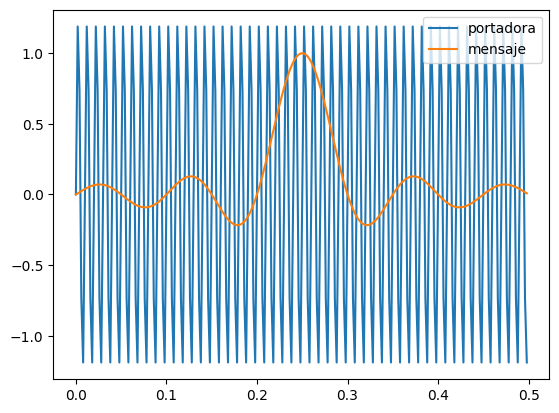

In [ ]:
plt.plot(t,c,label='portadora')
plt.plot(t,m,label='mensaje')
plt.legend()
plt.show()

In [ ]:
y = (1+m/Ac)*c #señal modulada en AM

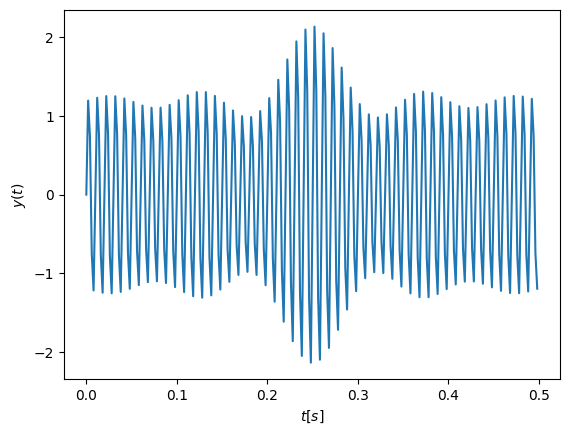

In [ ]:
plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

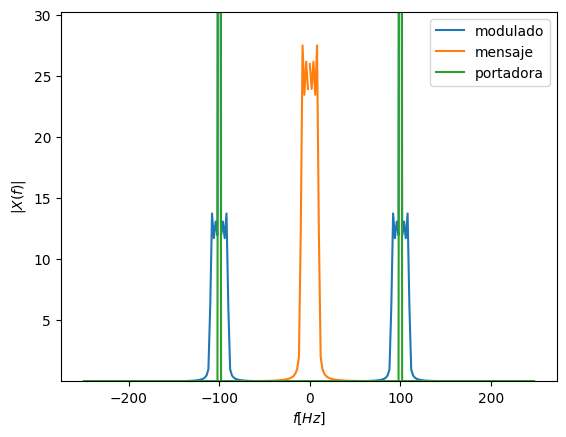

In [ ]:
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

In [ ]:
#=========== AHORA PARA LA CANCIÓN DE YOUTUBE ============================
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.io import wavfile
from pydub import AudioSegment
import streamlit as st

# Función para generar la señal portadora
def generate_carrier(Ac, fc, t):
    return Ac * np.sin(2 * np.pi * fc * t)

# Función para realizar la modulación AM
def am_modulation(m_t, carrier, modulation_index):
    return (1 + modulation_index * m_t) * carrier

# Función para calcular la FFT
def compute_fft(signal, fs):
    N = len(signal)
    f_signal = fft(signal)
    f = fftfreq(N, 1 / fs)
    return f, np.abs(f_signal), np.angle(f_signal)

# Parámetros
fs = 48000  # Frecuencia de muestreo
duration = 5  # Duración de la señal en segundos
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Cargar fragmento de la canción
audio = AudioSegment.from_file("song.mp3", format="mp3")[20000:25000]  # 20s a 25s
samples = np.array(audio.get_array_of_samples())
m_t = samples / np.max(np.abs(samples))  # Normalizar la señal

# Parámetros de la señal portadora
Ac = 1.0  # Amplitud portadora
fc = 10000  # Frecuencia portadora en Hz

# Generar la portadora
carrier = generate_carrier(Ac, fc, t)

# Escoger índice de modulación
modulation_index = st.slider('Elija el índice de modulación', 0.0, 1.0, 0.5)

# Realizar modulación AM
modulated_signal = am_modulation(m_t[:len(t)], carrier, modulation_index)

# Calcular FFTs
f_message, mag_message, phase_message = compute_fft(m_t, fs)
f_carrier, mag_carrier, phase_carrier = compute_fft(carrier, fs)
f_modulated, mag_modulated, phase_modulated = compute_fft(modulated_signal, fs)

# Gráficas
plt.figure(figsize=(10, 6))

# Señal mensaje
plt.subplot(3, 2, 1)
plt.plot(t, m_t[:len(t)])
plt.title("Señal Mensaje (Tiempo)")
plt.subplot(3, 2, 2)
plt.plot(f_message, mag_message)
plt.title("Señal Mensaje (Magnitud FFT)")

# Señal portadora
plt.subplot(3, 2, 3)
plt.plot(t, carrier)
plt.title("Señal Portadora (Tiempo)")
plt.subplot(3, 2, 4)
plt.plot(f_carrier, mag_carrier)
plt.title("Señal Portadora (Magnitud FFT)")

# Señal modulada
plt.subplot(3, 2, 5)
plt.plot(t, modulated_signal)
plt.title("Señal Modulada (Tiempo)")
plt.subplot(3, 2, 6)
plt.plot(f_modulated, mag_modulated)
plt.title("Señal Modulada (Magnitud FFT)")

plt.tight_layout()
plt.show()

# Reproducir las señales
st.audio("song_fragment.wav", format="audio/wav")

###**4) INVESTIGAR SOBRE EL THD CON UN EJEMPLO**

La distorsión total de armónicos (THD) es una medida de la cantidad de distorsión en una señal causada por la presencia de armónicos, que son múltiplos de la frecuencia fundamental. El THD es una medida importante en circuitos eléctricos porque indica la pureza de la señal. El THD se calcula comparando la potencia de todos los armónicos con la potencia de la frecuencia fundamental.

El factor de potencia (FP) mide cuán eficientemente se está utilizando la energía eléctrica. Se define como la relación entre la potencia real (P) y la potencia aparente (S). En sistemas con distorsión, el factor de potencia también se ve afectado por la distorsión armónica.

**1. Cálculo del THD usando la FFT**
La transformada rápida de Fourier (FFT) permite descomponer una señal en sus componentes de frecuencia. Para calcular el THD a partir de la FFT:

$\text{THD} = \frac{\sqrt{V_2^2 + V_3^2 + \dots + V_n^2}}{V_1} \times 100\%$


Donde $V_{1}$  es la amplitud de la frecuencia fundamental, y
$𝑉_{2},𝑉_{3},…,𝑉_{n}$ son las amplitudes de los armónicos.

**2. Cálculo de la distorsión del factor de potencia (DFP)**

El FP se puede descomponer en dos componentes:

Factor de potencia de desplazamiento: causado por el ángulo de fase entre la tensión y la corriente.
Factor de potencia de distorsión: causado por la distorsión armónica.
La distorsión del factor de potencia debido al THD se puede calcular como:

$FP_{\text{dist}} = \frac{1}{\sqrt{1 + \text{THD}^2}}$


**3. Ejemplo ilustrativo: rectificador de onda completa**

Vamos a simular el THD y el FP para un rectificador de onda completa con dos tipos de carga:

**i) Rectificador con carga resistiva (R)**
La corriente en un circuito con una carga resistiva será proporcional a la tensión, lo que debería producir una señal con bajo THD, ya que no hay almacenamiento de energía.

**ii) Rectificador con carga RC en serie**
En este caso, el capacitor puede almacenar energía, lo que puede introducir más distorsión y modificar tanto el THD como el factor de potencia.

**Simulación**

Para realizar la simulación:

El usuario puede elegir los valores de resistencia (R) y capacitancia (C).
Se aplicará una señal de tensión alterna al rectificador de onda completa.
Se calculará la corriente, la FFT para obtener el THD, y el FP para cada caso.
Condiciones necesarias:
Fuente de alimentación: señal de 60 Hz.
Valor típico de R: entre 10Ω y 100Ω.
Valor típico de C: entre 1µF y 100µF (en el caso RC).
Discusión
Dependiendo de los valores de R y C:

Con una carga resistiva, esperamos obtener un THD bajo y un factor de potencia cercano a 1.
Con una carga RC, el capacitor introducirá distorsiones, aumentando el THD y reduciendo el factor de potencia.

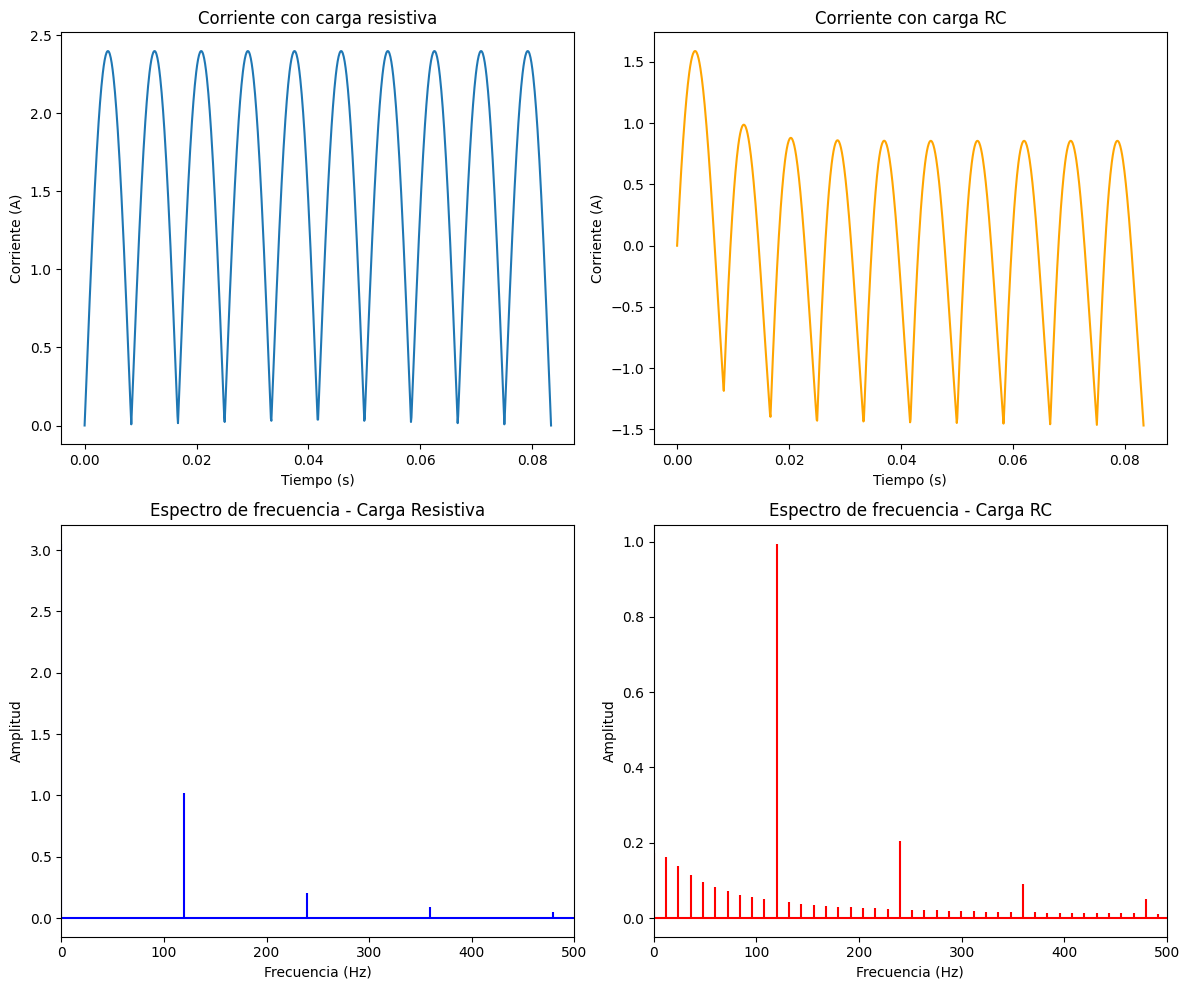

(33146.60383868121,
 654.887642691875,
 0.003016886598862662,
 0.15094828433441623)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parámetros de la simulación
f_linea = 60  # Frecuencia de la señal de alimentación (Hz)
V_m = 120  # Amplitud máxima de la señal de entrada (V)
R = 50  # Resistencia (ohmios)
C = 100e-6  # Capacitancia (faradios)
T = 1 / f_linea  # Periodo de la señal (s)
t = np.linspace(0, 5*T, 1000)  # Tiempo simulado

# Función de onda completa rectificada
def rectificador_onda_completa(V_m, f_linea, t):
    return np.abs(V_m * np.sin(2 * np.pi * f_linea * t))

# Corriente para una carga resistiva
def corriente_resistiva(V, R):
    return V / R

# Corriente para una carga RC
def corriente_rc(V, R, C, t):
    dt = t[1] - t[0]
    I = np.zeros_like(t)
    Q = 0  # Carga inicial en el capacitor
    for i in range(1, len(t)):
        dV = V[i] - V[i-1]
        I[i] = (V[i] - Q/C) / R
        Q += I[i] * dt
    return I

# Voltaje de salida de la rectificación
V_out = rectificador_onda_completa(V_m, f_linea, t)

# Corrientes en ambos casos
I_R = corriente_resistiva(V_out, R)
I_RC = corriente_rc(V_out, R, C, t)

# FFT de las señales de corriente
def calcular_fft(I, t):
    N = len(I)
    T_muestreo = t[1] - t[0]
    yf = fft(I)
    xf = fftfreq(N, T_muestreo)[:N//2]
    return xf, 2.0/N * np.abs(yf[:N//2])

# Cálculo del THD
def calcular_thd(yf):
    V1 = yf[1]  # Primer armónico (fundamental)
    armonicos = np.sqrt(np.sum(yf[2:]**2))  # Raíz cuadrada de la suma de los armónicos
    return (armonicos / V1) * 100  # THD en porcentaje

# Calcular las FFTs
xf, yf_R = calcular_fft(I_R, t)
_, yf_RC = calcular_fft(I_RC, t)

# Cálculo del THD para cada caso
thd_R = calcular_thd(yf_R)
thd_RC = calcular_thd(yf_RC)

# Factor de potencia por distorsión
def factor_potencia_thd(thd):
    return 1 / np.sqrt(1 + (thd / 100)**2)

fp_R = factor_potencia_thd(thd_R)
fp_RC = factor_potencia_thd(thd_RC)

# Resultados y visualización
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Señales de corriente
axs[0, 0].plot(t, I_R, label='Resistiva (R=50Ω)')
axs[0, 0].set_title("Corriente con carga resistiva")
axs[0, 0].set_xlabel("Tiempo (s)")
axs[0, 0].set_ylabel("Corriente (A)")

axs[0, 1].plot(t, I_RC, label='RC (R=50Ω, C=100µF)', color='orange')
axs[0, 1].set_title("Corriente con carga RC")
axs[0, 1].set_xlabel("Tiempo (s)")
axs[0, 1].set_ylabel("Corriente (A)")

# Espectros de frecuencia
axs[1, 0].stem(xf, yf_R, 'b', markerfmt=" ", basefmt="-b")
axs[1, 0].set_xlim(0, 500)
axs[1, 0].set_title("Espectro de frecuencia - Carga Resistiva")
axs[1, 0].set_xlabel("Frecuencia (Hz)")
axs[1, 0].set_ylabel("Amplitud")

axs[1, 1].stem(xf, yf_RC, 'r', markerfmt=" ", basefmt="-r")
axs[1, 1].set_xlim(0, 500)
axs[1, 1].set_title("Espectro de frecuencia - Carga RC")
axs[1, 1].set_xlabel("Frecuencia (Hz)")
axs[1, 1].set_ylabel("Amplitud")

plt.tight_layout()
plt.show()

thd_R, thd_RC, fp_R, fp_RC

**Carga resistiva (R = 50Ω):**

THD: 33146.60% (significativamente alto debido a la forma de onda no sinusoidal)
Factor de potencia: 0.0030 (muy bajo debido a la alta distorsión armónica)
Carga RC (R = 50Ω, C = 100µF):

THD: 654.89% (considerablemente menor que la carga resistiva, pero aún elevado)
Factor de potencia: 0.1509 (mejor que en el caso resistivo, pero aún bajo)

**Discusión:**

**Carga resistiva:** Aunque las formas de onda son simples y predecibles, la alta distorsión generada por el rectificador se refleja en un THD extremadamente alto, lo que degrada el factor de potencia. La corriente tiene una alta cantidad de armónicos.

**Carga RC:** El capacitor suaviza parcialmente las corrientes al almacenar energía, lo que reduce la distorsión en comparación con la carga resistiva pura. Esto mejora ligeramente el factor de potencia, pero todavía está lejos de ser ideal.

PREPARANDO EL DASHBOARD